# Transfer Learning

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


In [53]:
target_img_shape = (224, 224)    # image size W x H
EPOCH =20

# Load Data Set

In [54]:
train_dir = '/content/drive/MyDrive/Thaiherb/train'                   #สำหรับฝึกสอน Train   cat 100 dog 100
val_dir   = '/content/drive/MyDrive/Thaiherb/val'                      # ข้อมูลสำหรับสำหรับ Validation  cat 10 dog 10

# test_dir = '/content/drive/MyDrive/MY_data/test'

# Read Train set and Val Set

In [55]:
#Train Set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                                  rotation_range=20)
                                                  #  height_shift_range=0.15,
                                                  #  width_shift_range=0.15,
                                                  #  shear_range=0.2,
                                                  #  zoom_range=0.2,
                                                  #  horizontal_flip=True,
                                                  #  fill_mode='nearest')

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32,                          # แบ่งเป็น Batch ละ 32 ภาพ
                                                 class_mode='categorical')                 # คลาสแบบ categorical
#Validation Set
val_datagen = ImageDataGenerator(rescale = 1./255)

val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='categorical')

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


In [56]:
batch = train_set.__next__()
print(batch[0].shape)
print(batch[1].shape)

(32, 224, 224, 3)
(32, 10)


In [57]:
ids, counts = np.unique(train_set.classes, return_counts=True)

print(ids)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[160 160 160 160 160 160 160 160 160 160]


In [58]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

chaplu = 160
fahthalinejol = 160
horapa = 160
krapao = 160
 lemon = 160
magrud = 160
   plu = 160
sabtiger = 160
saranae = 160
yanang = 160


In [59]:
ids, counts = np.unique(val_set.classes, return_counts=True)

print(ids)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[40 40 40 40 40 40 40 40 40 40]


In [60]:
labels = (val_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

chaplu = 40
fahthalinejol = 40
horapa = 40
krapao = 40
 lemon = 40
magrud = 40
   plu = 40
sabtiger = 40
saranae = 40
yanang = 40


In [61]:

_, train_count = np.unique(train_set.classes, return_counts=True)
_, val_count = np.unique(val_set.classes, return_counts=True)

print('Ratio Validation/Training set:',
      val_count/(train_count+val_count) * 100)

Ratio Validation/Training set: [20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]


{'chaplu': 0, 'fahthalinejol': 1, 'horapa': 2, 'krapao': 3, 'lemon': 4, 'magrud': 5, 'plu': 6, 'sabtiger': 7, 'saranae': 8, 'yanang': 9}
(32, 224, 224, 3)
(32, 10)
class: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


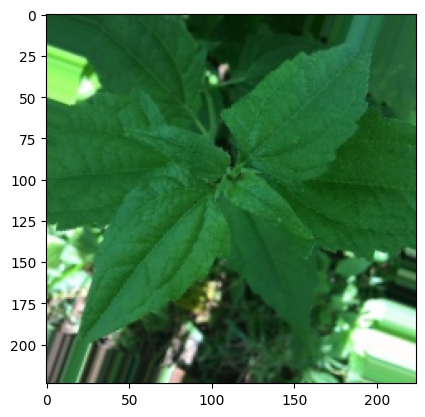

In [62]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    plt.imshow(image_batch[0])
    print('class:', labels_batch[0])

    break

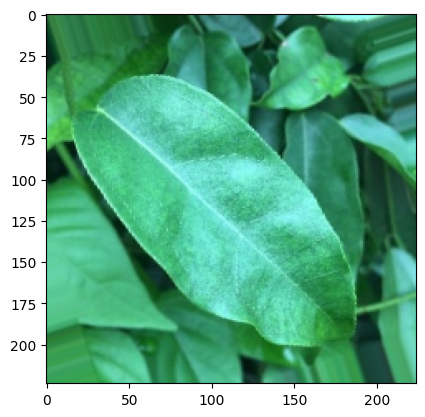

In [63]:
plt.imshow(train_set[0][0][0])
plt.show()

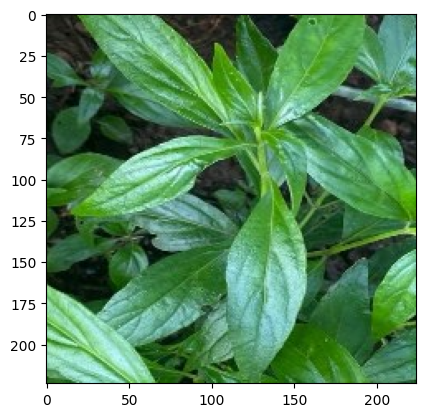

In [64]:
plt.imshow(val_set[0][0][0])
plt.show()

In [65]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(10,10))
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

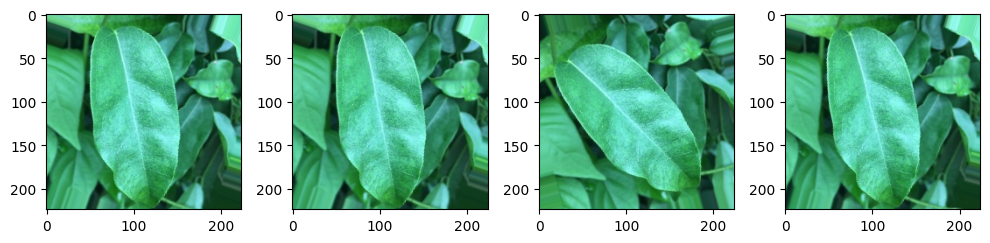

In [66]:
augmented_images = [train_set[0][0][0] for i in range(4)]
plotImages(augmented_images)

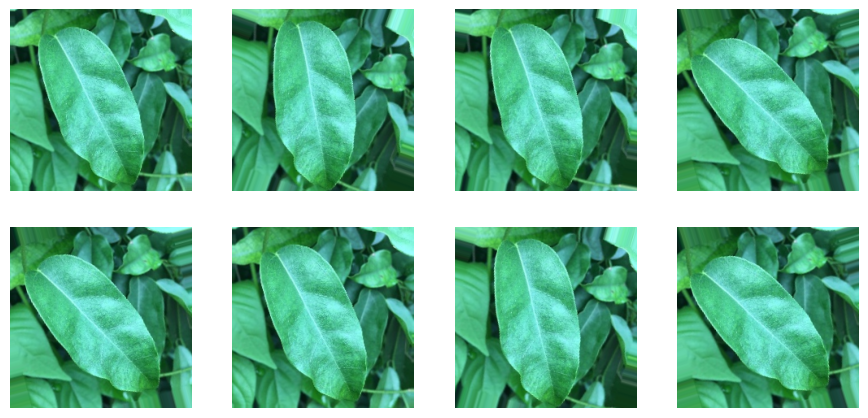

In [67]:
nplots = 8

def visual_multi(images_arr):
    fig = plt.figure(figsize=(11, 8))
    for j in range(nplots):

        plt.subplot(3, 4, j+1)
        plt.imshow(images_arr[j])

        plt.axis('off')

    plt.show()


augmented_images = [train_set[0][0][0] for i in range(nplots)]
visual_multi(augmented_images)

#Model VGG16

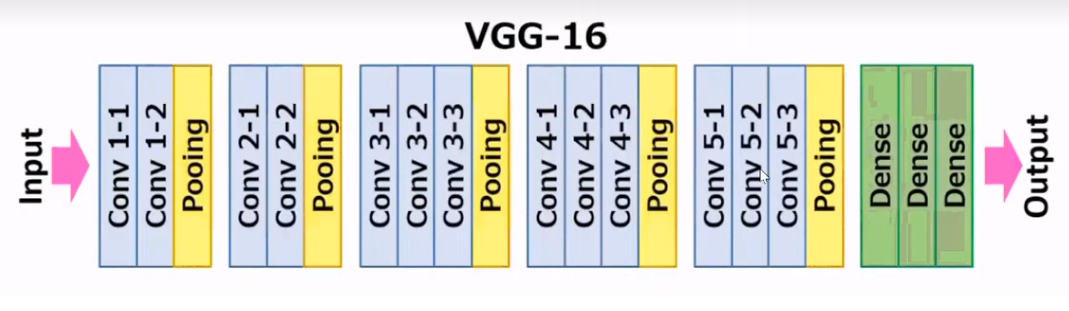

In [68]:
tf.keras.backend.clear_session()

In [69]:
#เตรียม Input
in_shape = (target_img_shape[0], target_img_shape[1], 3)
in_shape

(224, 224, 3)

In [70]:
#สร้าง base_model  โดยตัดส่วน Classification ทิ้ง
base_model = VGG16(include_top=False,
                     weights='imagenet',
                      input_shape=in_shape)
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
for layer in base_model.layers:
    layer.trainable = False

In [72]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model

# Define input tensor
input_tensor = Input(shape=(target_img_shape[0], target_img_shape[1], 3)) # Assuming target_img_shape is defined

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_tensor)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)  # 112x112x32 -> 56x56x32
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)  # 28x28x64 -> 14x14x64
x = Dropout(0.2)(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)  # 7x7x128 -> 3x3x128
x = Dropout(0.2)(x)

# Flatten and Dense layers
x = Flatten()(x)  # Flatten the feature maps

# Fully connected layers
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
# Output layer
output_tensor = Dense(10, activation='softmax')(x)  # Output layer with 10 classes

# Create the model
model = Model(inputs=input_tensor, outputs=output_tensor)

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,956,234 (49.42 MB)

 Trainable params: 12,956,234 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
print("Trainable..\n---")
for variable in model.trainable_variables:  # Change model_Vgg16 to base_model
    print(variable.name)

Trainable..
---
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias
kernel
bias


In [74]:
base_model.trainable = False

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,956,234 (49.42 MB)

 Trainable params: 12,956,234 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

# Compile and Train model

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming 'train_dir' is the path to your training images directory
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Thaiherb/train',
    target_size=(target_img_shape[0],
                 target_img_shape[1]),
    batch_size=32,
    class_mode='categorical')

num_classes = len(train_generator.class_indices)
print('Number of classes:', 10)

Found 1600 images belonging to 10 classes.
Number of classes: 10


In [76]:
import time
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy # Import correct loss function

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=CategoricalCrossentropy(), # Use CategoricalCrossentropy
              metrics=['accuracy'])

start = time.time()

history = model.fit(train_set,
                    validation_data=val_set,
                    epochs=20,
                    verbose=1)

end = time.time()

print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 40s 626ms/step - accuracy: 0.1149 - loss: 3.2044 - val_accuracy: 0.2525 - val_loss: 2.0772
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 31s 553ms/step - accuracy: 0.2628 - loss: 1.9740 - val_accuracy: 0.3100 - val_loss: 1.8417
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 551ms/step - accuracy: 0.4351 - loss: 1.5484 - val_accuracy: 0.4575 - val_loss: 1.4692
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 544ms/step - accuracy: 0.5545 - loss: 1.2766 - val_accuracy: 0.5625 - val_loss: 1.2844
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 30s 539ms/step - accuracy: 0.6571 - loss: 0.9757 - val_accuracy: 0.6275 - val_loss: 1.1814
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 545ms/step - accuracy: 0.7312 - loss: 0.8056 - val_accuracy: 0.7700 - val_loss: 0.7967
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 41s 537ms/step - accuracy: 0.8017 - loss: 0.5983 - val_accuracy: 0.7650 - val_loss: 0.7410
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 521ms/step - accuracy: 0.8401 - loss: 0.4593 - val_accuracy: 0.782

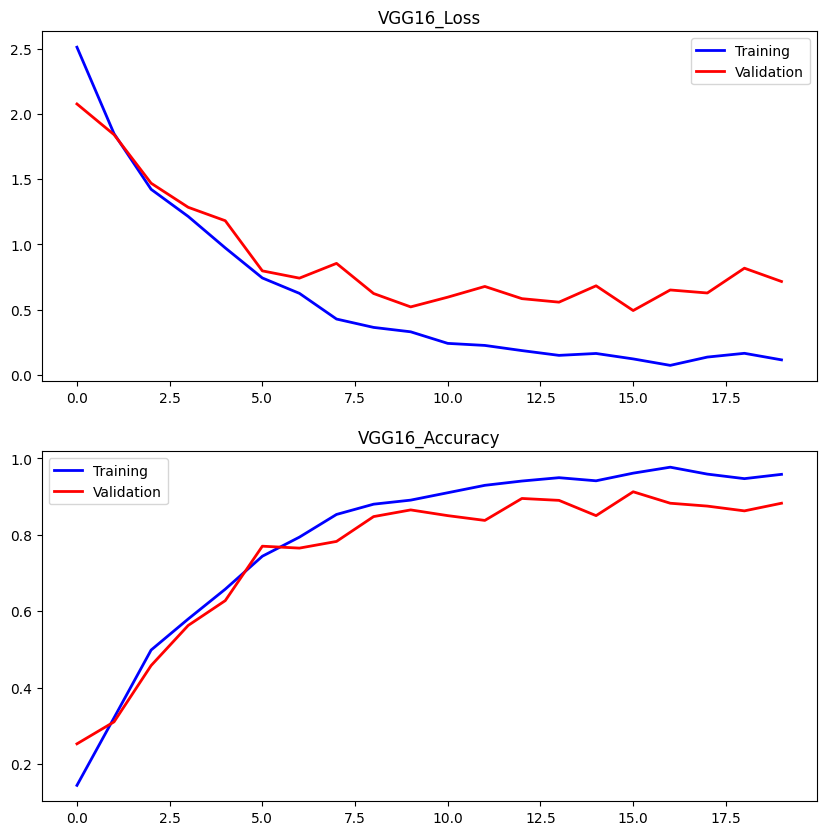

In [77]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('VGG16_Loss')
plt.plot(history.history['loss'],'b', lw=2,  label='Training')
plt.plot(history.history['val_loss'],'r', lw=2, label='Validation')
plt.legend()

plt.subplot(2, 1, 2)
plt.title('VGG16_Accuracy')
plt.plot(history.history['accuracy'],'b', lw=2,  label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=2, label='Validation')

plt.legend()
plt.show()

In [78]:
acc = model.evaluate(val_set,  verbose=1)
print('score = {:.3f}' .format(acc[1]))

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.8910 - loss: 0.7042
score = 0.882


In [79]:
def plot_learning_curve(history, metrics):
    acc = history.history[metrics]
    val_acc = history.history[f'val_{metrics}']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(5,3))
    plt.plot(epochs, acc, label=f'training {metrics}')
    plt.plot(epochs, val_acc, label=f'validation {metrics}')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel(metrics)
    plt.legend()

    plt.figure(figsize=(5,3))
    plt.plot(epochs, loss, label='training loss')
    plt.plot(epochs, val_loss, label='validation loss')
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

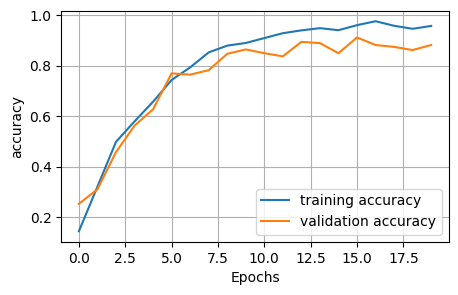

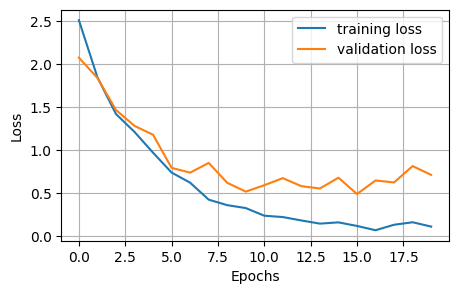

In [80]:
plot_learning_curve(history, metrics='accuracy')

In [81]:
# Assuming you have a directory for your test data, you can use ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your test data directory
test_data_dir = '/content/drive/MyDrive/Thaiherb/val'

# Create a test generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Adjust preprocessing as needed
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Replace with your image dimensions
    batch_size=32,
    class_mode='categorical'  # Or 'binary' if you have two classes
)

# Now you can evaluate your model
train_result = model.evaluate(train_generator)
test_result = model.evaluate(test_generator)

Found 400 images belonging to 10 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 536ms/step - accuracy: 0.9708 - loss: 0.0899
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.8841 - loss: 0.7647


In [82]:
print(f"Train Loss: {np.round(train_result[0], 4)}")
print(f"Test Loss: {np.round(test_result[0], 4)}")
print(f"Train Accuracy: {np.round(train_result[1], 3)}")
print(f"Test Accuracy: {np.round(test_result[1], 3)}")

Train Loss: 0.0879
Test Loss: 0.7153
Train Accuracy: 0.974
Test Accuracy: 0.882


In [83]:
y_pred_probs = model.predict(test_generator)
print(y_pred_probs.shape)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step
(400, 10)


In [84]:
y_true = test_generator.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [85]:
y_true.shape

(400,)

In [86]:

print('chaplu_cases: ',len(np.where(y_true==0)[0]))
print('fahthalinejol_cases: ',len(np.where(y_true==1)[0]))
print('horapa_cases: ',len(np.where(y_true==2)[0]))
print('krapao_cases: ',len(np.where(y_true==3)[0]))
print('lemon_cases: ',len(np.where(y_true==4)[0]))
print('magrud_cases: ',len(np.where(y_true==5)[0]))
print('plu_cases: ',len(np.where(y_true==6)[0]))
print('sabtiger_cases: ',len(np.where(y_true==7)[0]))
print('saranae_cases: ',len(np.where(y_true==8)[0]))
print('yanang_cases: ',len(np.where(y_true==9)[0]))

chaplu_cases:  40
fahthalinejol_cases:  40
horapa_cases:  40
krapao_cases:  40
lemon_cases:  40
magrud_cases:  40
plu_cases:  40
sabtiger_cases:  40
saranae_cases:  40
yanang_cases:  40


In [87]:
y_pred_probs = model.predict(test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step


In [88]:
classes_names = list(test_generator.class_indices.keys())

In [89]:
# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
# Calculate confusion matrix
confusion = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", confusion)
# Calculate perfect confusion matrix
p_confusion = confusion_matrix(y_true, y_true)
print("Perfect Confusion Matrix:\n", p_confusion)
# Calculate precision, recall, and f1-score
report = classification_report(y_true, y_pred, target_names=classes_names)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[ 4  4  3  9  2  4  7  1  3  3]
 [ 4  2  5  2  7  6  2  6  2  4]
 [ 5  2  0  6  4  4  3  4  5  7]
 [ 1  4  9  1  2  7  7  4  1  4]
 [ 1  3  2  3  3  4 10  6  4  4]
 [ 2  3  6  9  3  6  1  2  4  4]
 [ 4  2  1  7  2  8  2  5  2  7]
 [ 4  3  1  6  1  7  7  4  5  2]
 [ 7  4  4  5  5  4  2  4  3  2]
 [ 3  4  8  5  3  5  2  4  0  6]]
Perfect Confusion Matrix:
 [[40  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 40  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  0  0  0  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0  0  0 40]]

Classification Report:
                precision    recall  f1-score   support

       chaplu       0.11      0.10      0.11        40
fahthalinejol       0.06      0.05      0.06        40
       horapa       0.00      0.00      0.00        40
       krapao       0.02      0.03      0.02  

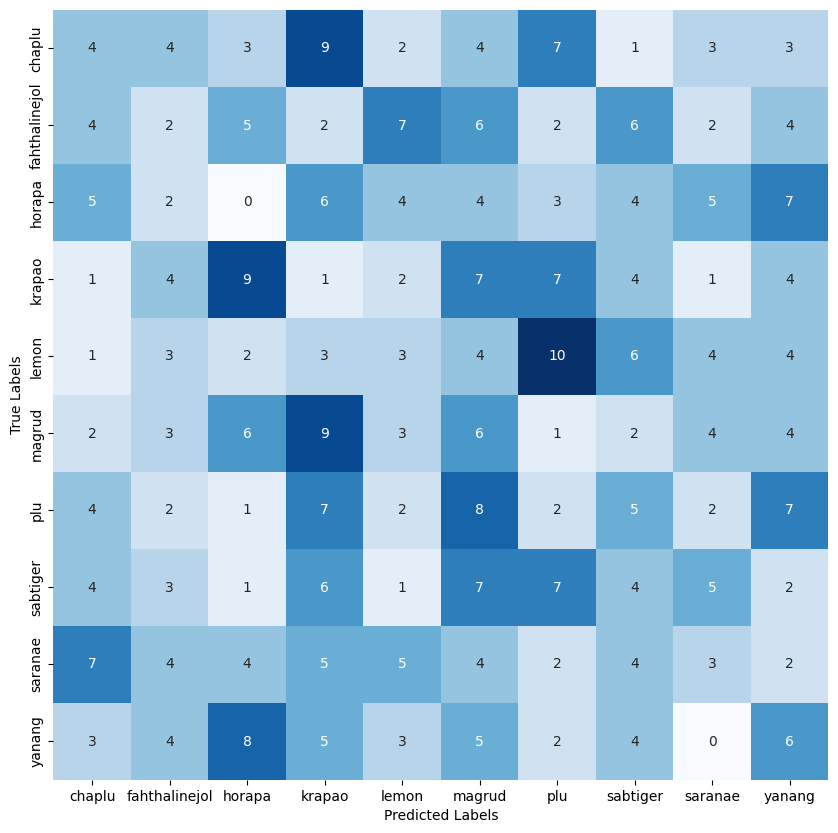

In [90]:
plt.figure(figsize=(10, 10))
hmap = sns.heatmap(confusion, annot=True, vmin=0,
                 fmt='g', cmap='Blues', cbar=False,
                 xticklabels=classes_names,
                 yticklabels=classes_names)

hmap.set(xlabel='Predicted Labels')
hmap.set(ylabel='True Labels')
plt.show()